<a href="https://colab.research.google.com/github/martinbedia/mineria/blob/main/6nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
!python aux.py   # ejecutar las funciones que hay en ese archivo aux.py (campus)

In [17]:
# cargar conjunto de datos
df = pd.read_csv("ejemplo_knn1_train.csv")
df

,Variable1,Variable2,Clase
0,0.967030,0.547232,1.0
1,0.972684,0.714816,1.0
2,0.697729,0.216089,0.0
3,0.976274,0.006230,0.0
4,0.252982,0.434792,0.0
5,0.779383,0.197685,0.0
6,0.862993,0.983401,1.0
7,0.163842,0.597334,0.0
8,0.008986,0.386571,0.0
9,0.044160,0.956653,1.0


In [18]:
# separar las variables predictoras de la que queremos pronosticar
# contiene las variables
X = df[['Variable1','Variable2']].values
# contiene el tipo
y = df[['Clase']].values

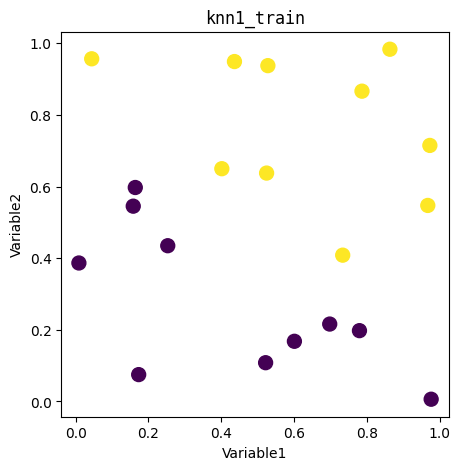

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5)) # crear una figura
plt.scatter(X[:, 0], # eje x
            X[:, 1], # eje y
            c=y, # utilizamos las clases para colorear
            s=100) # aumentar tamaño por defecto)
plt.title('knn1_train', family='monospace') # título
plt.xlabel('Variable1') # eje x
plt.ylabel('Variable2') # eje y
plt.show()

In [20]:
df = pd.read_csv("ejemplo_knn1_test.csv")
df

,Variable1,Variable2,Clase
0,0.396900,0.623916,1.0
1,0.767405,0.178974,0.0
2,0.375576,0.502533,0.0
3,0.686667,0.253680,0.0
4,0.554741,0.624931,1.0


In [21]:
# separar las variables predictoras de la que queremos pronosticar
# contiene las variables
X_test = df[['Variable1','Variable2']].values
# contiene el tipo
y_test = df[['Clase']].values

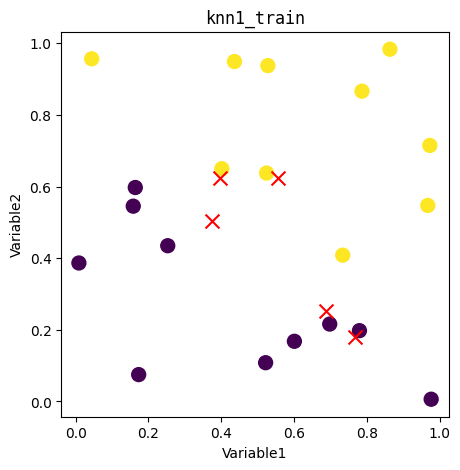

In [23]:
plt.figure(figsize=(5, 5)) # crear una figura

# conjunto de entrenamiento
plt.scatter(X[:, 0], # eje x
            X[:, 1], # eje y
            c=y, # utilizamos las clases para colorear
            s=100) # aumentar tamaño por defecto)

# datos a pronosticar
plt.scatter(X_test[:, 0], # eje x
            X_test[:, 1], # eje y
            c='red', # utilizamos las clases para colorear
            marker='x',
            s=100) # aumentar tamaño por defecto)


plt.title('knn1_train', family='monospace') # título
plt.xlabel('Variable1') # eje x
plt.ylabel('Variable2') # eje y
plt.show()

In [24]:
import numpy as np

def distancia_euclidea(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))    # ** elevado al cuadrado

In [25]:
from collections import Counter

In [46]:
def visualizar_vecinos(X_train, y_train, dato_nuevo, indices_vecinos, clase):    # campus

    # Mostrar conjunto de entrenamiento
    plt.scatter(X_train[:, 0],
                X_train[:, 1],
                c=y_train,
                edgecolors='k', marker='o', s=100, label='Training')

    # Resaltar los vecinos más cercanos del punto
    plt.scatter(X_train[indices_vecinos, 0],
                X_train[indices_vecinos, 1],
                facecolors='none',
                edgecolors='red', # rodear en rojo
                linewidths=2,
                s=100,
                label='Vecinos más cercanos')

    # Mostrar el nuevo dato que queremos clasficar
    plt.scatter(dato_nuevo[0],
                dato_nuevo[1],
                c=clase,
                vmin=0, vmax=1,
                marker='x', s=200, label='Test Point')

    plt.title('Vecinos más cercanos de {}'.format(dato_nuevo))
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')

    plt.gca().set_aspect('equal', adjustable='box')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

In [47]:
def clasificar_dato_usando_knn(X_train, y_train, dato_nuevo, k=3):

  # obtener todas las distancias
  distancias = [distancia_euclidea(dato_nuevo, x_train) for x_train in X_train]

  # seleccionar los k objetos mas cercanos
  k_indices = np.argsort(distancias)[:k]
  etiquetas_de_los_vecinos = [y_train[i] for i in k_indices]

  # asigno la clase al dato nuevo
  etiqueta_dato_nuevo = Counter(etiquetas_de_los_vecinos).most_common(1)
  etiqueta_dato_nuevo = etiqueta_dato_nuevo[0][0]

  # visualizar que pasa
  visualizar_vecinos(X_train, y_train, dato_nuevo, k_indices, etiqueta_dato_nuevo)

  # devolver la clase
  return etiqueta_dato_nuevo

In [48]:
def aplicar_knn_datos_nuevos(X_test, X_train, y_train, k=3):

  for i, x_test in enumerate(X_test):
    clasificar_dato_usando_knn(X_train,y_train, x_test)

aplicar_knn_datos_nuevos(X_test, X, y)    # X e y donde tenia las varibales almacenadas

TypeError: ignored

El anterior la sube corregida

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [36]:
clasificador.predict(X_test)

array([1., 0., 1., 0., 1.])

In [38]:
clasificador.predict_proba(X_test)

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [45]:
clasificador.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [50]:
df = pd.read_csv('knn_ejemplo_4d_train.csv')
X = df.drop('Clase',axis=1)
y = df[['Clase']]

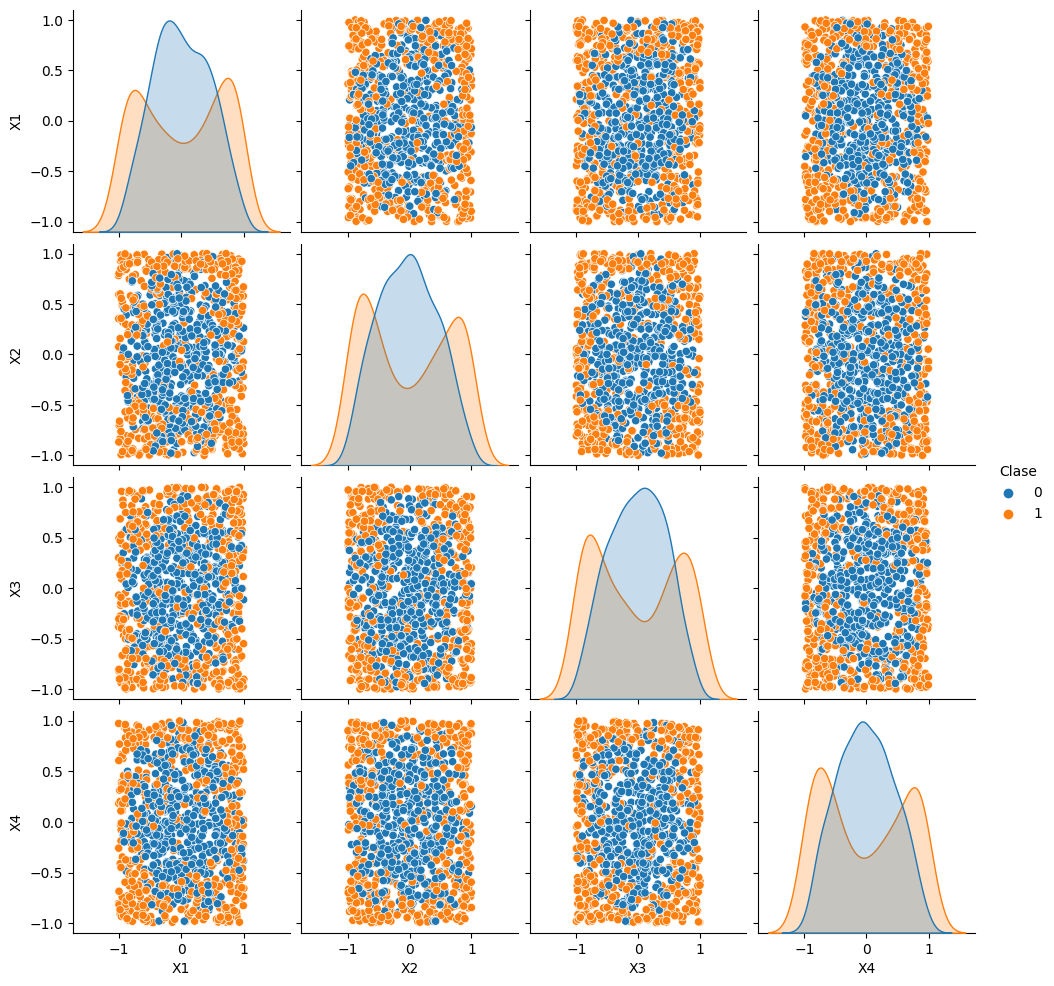

In [51]:
import seaborn as sns

sns.pairplot(df,hue='Clase')   # si tiene muchas varibles puede petar
plt.show()

In [52]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'Clase'], dtype='object')

In [54]:
df.describe()    # escalar si las variables son muy diferentes

,X1,X2,X3,X4,Clase
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.013630,-0.028848,-0.025896,-0.021732,0.492000
std,0.561433,0.586186,0.575072,0.572591,0.500186
min,-0.999401,-0.999467,-0.999575,-0.993060,0.000000
25%,-0.433785,-0.544120,-0.512349,-0.509190,0.000000
50%,0.001699,-0.033839,-0.040360,-0.032196,0.000000
75%,0.492192,0.466330,0.462181,0.460314,1.000000
max,0.999711,0.999293,0.999969,0.997691,1.000000


In [55]:
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [56]:
df_test = pd.read_csv('knn_ejemplo_4d_test.csv')
X_test = df_test.drop('Clase',axis=1)
y_test = df_test[['Clase']]

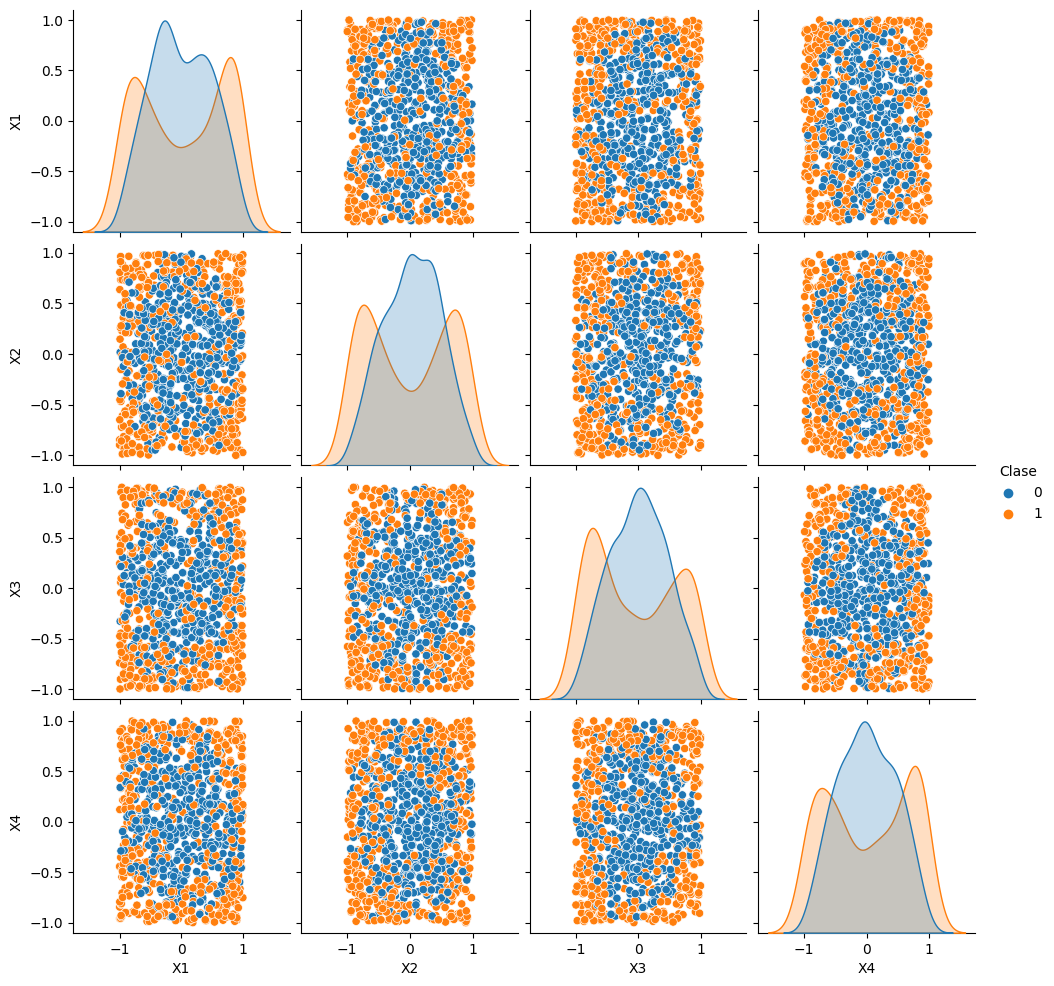

In [57]:
sns.pairplot(df_test,hue='Clase')   # si mas o menos se corresponde con el de entrenamiento esta bien
plt.show()